<div style="max-width: 750px;">
<h1> Exploritory Data Analysis </h1>
<h2> Combining Data Sets </h2>
<p>
    For the project the two datasets are downloaded from kaggle. A fraudTest.csv and fraudTrain.csv. These two datasets will be combined 
    and Exploritory Data Analysis will be done across the whole set. This combination is necessary for us to understand all the data and 
    for the ability to choose where the data will be split for training and testing.
</p>
</div>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
#read train and test csv
test_df = pd.read_csv('../data/fraudTest.csv')

train_df = pd.read_csv('../data/fraudTrain.csv')

#ensure columns are the same before combining sets
print(test_df.shape)
print(train_df.shape)
if test_df.columns.equals(train_df.columns):
    df = pd.concat([test_df, train_df], ignore_index=True)
    print(df.shape)
else:
    print("::ERROR:: columns are not equal")

(555719, 23)
(1296675, 23)
(1852394, 23)


In [4]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 23 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Unnamed: 0             int64  
 1   trans_date_trans_time  object 
 2   cc_num                 int64  
 3   merchant               object 
 4   category               object 
 5   amt                    float64
 6   first                  object 
 7   last                   object 
 8   gender                 object 
 9   street                 object 
 10  city                   object 
 11  state                  object 
 12  zip                    int64  
 13  lat                    float64
 14  long                   float64
 15  city_pop               int64  
 16  job                    object 
 17  dob                    object 
 18  trans_num              object 
 19  unix_time              int64  
 20  merch_lat              float64
 21  merch_long             float64
 22  is_fraud          

Many of the variables are categorical. This means they will need to be encoded before they can be used within the machine learning model.

In [7]:
df.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06
mean,5.371934e+05,4.173860e+17,7.006357e+01,4.881326e+04,3.853931e+01,-9.022783e+01,8.864367e+04,1.358674e+09,3.853898e+01,-9.022794e+01,5.210015e-03
std,3.669110e+05,1.309115e+18,1.592540e+02,2.688185e+04,5.071470e+00,1.374789e+01,3.014876e+05,1.819508e+07,5.105604e+00,1.375969e+01,7.199217e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902742e+01,-1.666716e+02,0.000000e+00
25%,2.315490e+05,1.800429e+14,9.640000e+00,2.623700e+04,3.466890e+01,-9.679800e+01,7.410000e+02,1.343017e+09,3.474012e+01,-9.689944e+01,0.000000e+00
50%,4.630980e+05,3.521417e+15,4.745000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.443000e+03,1.357089e+09,3.936890e+01,-8.744069e+01,0.000000e+00
75%,8.335758e+05,4.642255e+15,8.310000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.374581e+09,4.195626e+01,-8.024511e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.992100e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.388534e+09,6.751027e+01,-6.695090e+01,1.000000e+00


Summary of statistics for numeric columns

In [9]:
df.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

There are no missing or null values in the dataset

## Explore Distribution of target column

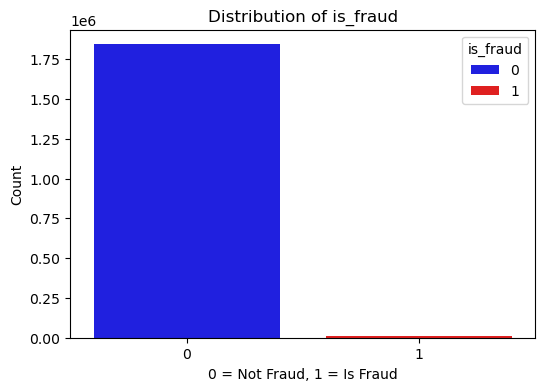

In [12]:
#check the distribution of target column

plt.figure(figsize=(6, 4))
sns.countplot(x='is_fraud', data=df, hue='is_fraud', palette={0: 'blue', 1: 'red'})
plt.title('Distribution of is_fraud')
plt.xlabel("0 = Not Fraud, 1 = Is Fraud")
plt.ylabel("Count")
plt.show()


<div style="max-width: 750px;">
<h1> Explore Correlations </h1>
<p>
To see correlations a heatmap will be created based on the numeric columns only.
</p>
</div>

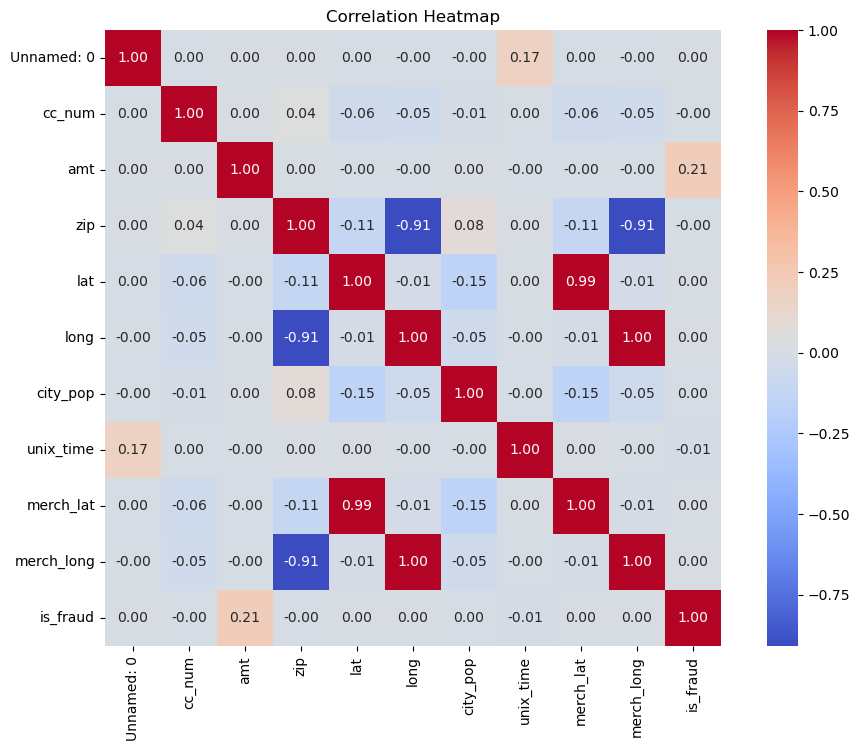

In [14]:
#create a dataframe of numeric columns
numeric_df = df.select_dtypes(include='number')

#compute the correlation matrix
corr = numeric_df.corr()

#plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Correlation Heatmap")
plt.show()

<div style="max-width: 750px;">
<p>
    There appears to be minimal correlation among most variables, with the exception of amt, which shows some correlation with the target 
    variable is_fraud. The amt feature represents the dollar amount of each credit card transaction and may play a key role in distinguishing fraudulent behavior.
</p>
</div>

<div style="max-width: 750px;">
<h2>Feature Engineering</h2>
<p>
There are several columns within the dataset that unneeded and/or redundant. for these columns it is best to drop them. Such columns are "trans_num", "first", "last", and "unix_time"
</p>

In [17]:
columns_to_drop = ['trans_num', 'first', 'last', 'unix_time', "city", "state", "street", "zip", "dob", "Unnamed: 0"]
df.drop(columns=columns_to_drop, inplace=True, errors='ignore')
print(df.shape)
df.head()

(1852394, 13)


,trans_date_trans_time,cc_num,merchant,category,amt,gender,lat,long,city_pop,job,merch_lat,merch_long,is_fraud
0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,M,33.9659,-80.9355,333497,Mechanical engineer,33.986391,-81.200714,0
1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,F,40.3207,-110.4360,302,"Sales professional, IT",39.450498,-109.960431,0
2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,F,40.6729,-73.5365,34496,"Librarian, public",40.495810,-74.196111,0
3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,M,28.5697,-80.8191,54767,Set designer,28.812398,-80.883061,0
4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,M,44.2529,-85.0170,1126,Furniture designer,44.959148,-85.884734,0


Encoding Categorical Variables

In [19]:
from sklearn.preprocessing import LabelEncoder

for col in ["merchant", "category", "job", "gender"]:
    df[col] = LabelEncoder().fit_transform(df[col])

In [20]:
df["trans_date_trans_time"] = pd.to_datetime(df["trans_date_trans_time"])
df["hour"] = df["trans_date_trans_time"].dt.hour
df["day"] = df["trans_date_trans_time"].dt.day
df["month"] = df["trans_date_trans_time"].dt.month
df = df.drop(columns=["trans_date_trans_time"])

In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE


scaler = StandardScaler()
numeric_cols = ["amt", "lat", "long", "city_pop", "merch_lat", "merch_long"]
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])


X = df.drop(columns=["is_fraud"])
y = df["is_fraud"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

smote = SMOTE(sampling_strategy=0.5, random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

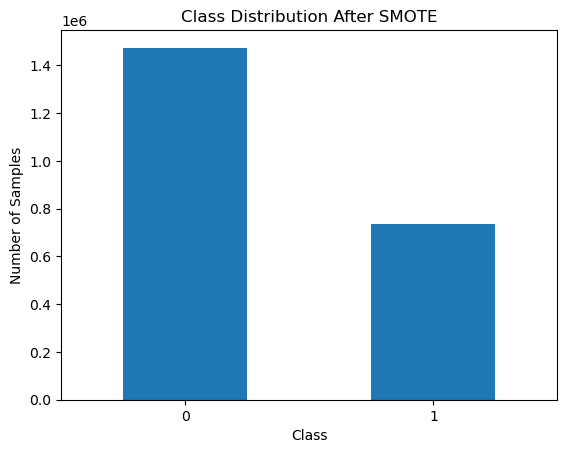

In [22]:
y_train_resampled.value_counts().plot(kind='bar')
plt.title("Class Distribution After SMOTE")
plt.xlabel("Class")
plt.ylabel("Number of Samples")
plt.xticks(rotation=0)
plt.show()

In [23]:
print(pd.Series(y_train_resampled).value_counts())

is_fraud
0    1474194
1     737097
Name: count, dtype: int64


<div style="max-width: 750px;">
<p>
'first' and 'last' are dropped from the table due their high cardinality. likely everyone will have a different name and thus it has very little to no predictive power.
'trans_num' was dropped for the same reason, each row will have a different trans_num and it will not help the model.
'unix_time' is dropped because of it is redundant. there is already 'trans_date_trans_time' which is already displayed in an easier format to use. both collumns give the same information
so only one is needed.
</p>

<div style="max-width: 750px;">
<h2>Baseline method implementation and result analysis</h2>
<p>
Making a baseline random forest classifier and testing it with 
</p>

In [26]:
from sklearn.model_selection import train_test_split

le = LabelEncoder()
df['merchant'] = le.fit_transform(df['merchant'])
df['category'] = le.fit_transform(df['category'])
df['job'] = le.fit_transform(df['job'])
df['gender'] = le.fit_transform(df['gender'])

y = df[['is_fraud']].values
df = df.drop(['is_fraud'], axis = 1)
# Assign df values to x
x = df.values

print(x.shape)
print(y.shape)

xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size = 0.2, stratify = y, random_state = 1238)

(1852394, 14)
(1852394, 1)


In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error

#create decision tree classifier
clf_1 = DecisionTreeClassifier(criterion = 'entropy', random_state = 30, max_depth = 1, max_leaf_nodes = 5)
#clf_2 = DecisionTreeClassifier(criterion = 'entropy', random_state = 30, max_depth = 2, max_leaf_nodes = 10)
#clf_3 = DecisionTreeClassifier(criterion = 'entropy', random_state = 30, max_depth = 5, max_leaf_nodes = 15)
#clf_4 = DecisionTreeClassifier(criterion = 'entropy', random_state = 30, max_depth = 25, max_leaf_nodes = 25)

#fit classifier model
clf_1.fit(xtrain, ytrain)
#clf_2.fit(xtrain, ytrain)
#clf_3.fit(xtrain, ytrain)
#clf_4.fit(xtrain, ytrain)

#predict
ypred_clf1 = clf_1.predict(xtest)
#ypred_clf2 = clf_2.predict(xtest)
#ypred_clf3 = clf_3.predict(xtest)
#ypred_clf4 = clf_4.predict(xtest)

#calculate mean_squared_error
mse1 = mean_squared_error(ytest, ypred_clf1)       
#mse2 = mean_squared_error(ytest, ypred_clf2)          
#mse3 = mean_squared_error(ytest, ypred_clf3)          
#mse4 = mean_squared_error(ytest, ypred_clf4)          


#print("MSE 1,2,3,4: ", mse1,mse2,mse3,mse4)
print("MSE 1: ", mse1)


MSE 1:  0.005209472061844261


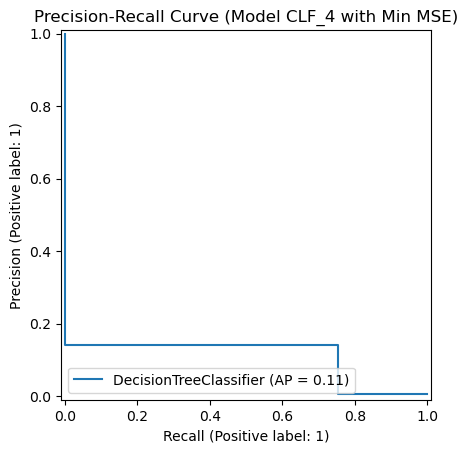

In [28]:
from sklearn.metrics import precision_recall_curve
# Or this below one, whichever suits you
from sklearn.metrics import PrecisionRecallDisplay
import matplotlib.pyplot as plt

ytest_1d = ytest.ravel()

disp = PrecisionRecallDisplay.from_estimator(clf_1, xtest, ytest_1d)
plt.title(f'Precision-Recall Curve (Model CLF_4 with Min MSE)')
plt.show()

In [29]:
from sklearn.metrics import classification_report, f1_score
rfPred = clf_1.predict(xtest)

print("Decision Tree Score:", f1_score(y_test, ypred_clf1))

print("\nDecision Tree Score:\n", classification_report(y_test, ypred_clf1))

Decision Tree Score: 0.0

Decision Tree Score:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00    368549
           1       0.00      0.00      0.00      1930

    accuracy                           0.99    370479
   macro avg       0.50      0.50      0.50    370479
weighted avg       0.99      0.99      0.99    370479



/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Random Forest

In [31]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=30, n_jobs=-1)
rf.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(n_jobs=-1, random_state=30)

In [32]:
from sklearn.metrics import classification_report, f1_score
rfPred = rf.predict(X_test)

print("Random Forest Score:", f1_score(y_test, rfPred))

print("\nRandom Forest Report:\n", classification_report(y_test, rfPred))

Random Forest Score: 0.6598850066342327

Random Forest Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    368549
           1       0.58      0.77      0.66      1930

    accuracy                           1.00    370479
   macro avg       0.79      0.89      0.83    370479
weighted avg       1.00      1.00      1.00    370479



<div style="max-width: 750px;">
<h2>What we set up and what we have to do in the future</h2>
<p>
Making a baseline random forest classifier and testing it with 
</p>

<div style="max-width: 750px;">
<p>
We set up a baseline descicion tree model and did a MSE assessment on it and graphed it on a precision_recall curve

We understand that this is not the best model we could use and may use an SVM or a random forest classifier

We may have to do dimensionality reduction, may have to do a better analysis of the features for a more accurate feature engineering.

What we have right now is a very poor and baseline model, but we can always explore more models as the project progresses.

We may switch our model to a neural network since that may provide us a better predictor of fraud since our dataset is very large.
</p>

<div style="max-width: 750px;">
<h2>Final Report</h2>
<p>

</p>

<div style="max-width: 750px;">
<h3>Credit Card Fraud Detection </h3>
<p>
Team members: Galavardino Sousa, Dylan Hall, Brandon Luu
</p>

<div style="max-width: 750px;">
<h2>Project Summary</h2>
<p>
Give a clear and complete statement of the problem:
The problem that we wanted to try solving was detecting credit card fraud and predicting it given a dataset of credit card transactions.

What is the benchmark we are using and why:
The benchmark that we are using for our problem is the existing amount of  models that exist for detecting fraud on our dataset. These other models were able to achieve ~99.9% overall accuracy, but were correct in guessing about 80-85% of fraud cases using random forest models and linear regression models. We are using this benchmmark because it will gauge for us how accurate our model will be compared to similar versions of it.

Where does the data come from and the characteristics:
The dataset comes from Kaggle and is a fairly popular dataset as it has around 500k views and around 80k downloads. It has 23 columns and 1,296,675 rows. This makes it so our dataset passes the initial rule set that our Rows X Columns had to be over 1 million. Informal success measures that we will use to evaluate our model are the amount of fraud cases accurately caught and the false-alarm rate.

What do we hope to achieve:
We hope to achieve a model that is able to detect fraud in the first place, and see if we can improve it or fix it to raise the accuracy and the f1-score of our model.
</p>

<div style="max-width: 750px;">
<h2>Dataset</h2>
<p>

Description of the Dataset:

Our dataset that we got from Kaggle has 23 columns and 1,296,675 rows in the train csv file. All of the data is simulated and the dataset itself explains that they used Sparkov Data Generation to create the data. The names of the variables in the dataset include:

Un-named (This is for the ID value of each transaction).

trans_date_trans_time (These are the date and times of each credit card transaction).

cc_num (The credit card number associated with the transaction).

merchant (The merchant that the credit card was used at).

category (The category that the transaction fits under, such as travel or personal care).

amt (The total cost of the transaction).

first (The first name of the credit card holder).

last (The last name of the credit card holder).

gender (The gender of the credit card holder).

street (The street the credit card holder lives on).

city (The city the credit card holder lives in).

state (The state the credit card holder lives in).

zip (The zip code of the credit card holder).

lat (The latitude value for where the credit card holder lives).

long (The longitude value for where the credit card holder lives).

city_pop (The population of the city where the credit card holder lives).

job (The job fo the credit card holder).

dob (The date of birth of the credit card holder).

trans_num (The string of values linked with the credit card transaction).

unix_time (The exact time in seconds of the purchase made with the credit card).

merch_lat (The latitude value of the merchant).

merch_long (The logitude value of the merchant).

is_fraud (The value which indicates if a transaction is fraud or not).


If using benchmarks, describe data in details:
Most of the data is information about the credit card holder, but the important variables to look at are the merchant, amt,  lat and long, merch lat and long, category, and such. These are important because they would be our biggest indicators of if a transaction is fraud or not. If a purchase made by a credit card holder is far away from their residential lat and long, it could signal fraud. The amount that the purchase costs could also be a big indicator.


</p>

<div style="max-width: 750px;">
<h2>Exploratory Data Analysis</h2>
<p>

Describe the methods you explored (usually algorithms, or data wrangling approaches:
We started with exploratory data analysis by combining the fraudTrain.csv and fraudTest.csv datasets into one unified dataframe. After verifying the data integrity and the absense of null values, we examined the class distributions of is_fraud and visualized feature correlations among numeric variables. These steps helped guide our understanding of the data structure and relationships.


Justify methods for feature normalization selection and the modeling approach you are planning to use:
We plan to normalize numerical features using techniques like StandardScaler or MinMaxScaler to prepare for models sensitive to scale, such as logistic regression. For classification, we are considering models like Random Forest and XGBoost, which handle class imbalance well and offer strong performance. Encoding of categorical variables will also be necessary to ensure compatibility with these models.


</p>

<div style="max-width: 750px;">
<h2>Data Preprocessing</h2>
<p>

Have we considered dimensionality reduction or scaling:
We have considered it, but did not do it as we chose to instead use SMOTE to equalize the amount of is_fraud. While we could have reduced dimensionality for our model, we did a correlation matrix on our data and saw that we were workign with very little in terms of high correlation variables. This meant that all the data we had would be valuable, so doing dimension reduction could have hurt our model.

We could use it in the future to see if it would hurt or help our model, but that is more in the experimentation category.

</p>

<div style="max-width: 750px;">
<h2>Machine Learning Approaches</h2>
<p>

What is our baseline evalutation setup:
We set up a decision tree classifier as our baseline model. We chose this since we already saw the abilities of linear regression in previous models done on this dataset, so we wanted to try something else and see if it could perform. We are using a member of the tree based model family as we knew that we would end up suign random forest on our second implementation of a model. We wanted to see if the performance difference of a decision tree could be seen against a random forest model.

Describe the methods/datasets that we ended up using for modelling:
For our baseline model, we just ended up using the dataset itself with a couple of columns that we dropped and columns that we had to label encode since they were strings. We wanted to see if we could generate a model on the base data and see if anything needed to be changed for further implementations.

Justify selection of machine learning tools that we used:
We chose to use sci-kit learn, seaborn, numpy, and pandas for our project as these were the tools that we learned in class and figured they were the tools we knew how use best. 

Our two models:

Baseline model: Decision tree classifier

Second implementation model: Random Forest Classifier


</p>

<div style="max-width: 750px;">
<h2>Experiments</h2>
<p>

***Describe how did you evaluate your solution
What evaluation metrics did you use?***
We split the data using stratified train-test split and used SMOTE to address class imbalance in the training set. Evaluation was performed on the untouched test set to simulate real-world deployment conditions.
We used accuracy, precision, recall, F1-score, and AUC-ROC as evaluation metrics. These metrics are suitable given the class imbalance in fraud detection.

***Describe a baseline model***
For our baseline model we used a decision tree classifier without any feature scaling or resampling. We couldn't justify putting what we got in terms of ourperforming since we  realized our data was unbalanced, which lead to our baseline model not accurately printing our the f1 scores and such.


***Were there other models evaluated on the same dataset(s)?***
***How did your model do in comparison to theirs?***
***Present error analysis and suggestions for future improvement.***
There are a lot of random forest models evaluated on this dataset. We got fairly close to one bronze medalist that got a score of 71 and ours was 65. False negatives mostly occurred in low-value or frequent transactions, making fraud harder to detect. In future iterations, we plan to engineer more temporal or behavioral features and evaluate ensemble models further.


    
</p>

<div style="max-width: 750px;">
<h2>Conclusion</h2>
<p>

***What did not work?***
Some methods, such as using a Decision Tree without resampling or scaling, did not perform well due to poor recall on the fraud class, leading to many false negatives. This failure was evident in evaluation metrics like F1-score and AUC-ROC, which remained low in baseline tests.

***Why do we think it didn't work?***
The decision tree likely did not perform well due to overfitting adn the class imbalance in the dataset since fraudulent transactions are rare. The tree may have prioritized accuracy by predicting the majority class.

***What were approaches and tuning model parameters we tried***
We experimented with SMOTE to handle class imbalance and used models like Random Forest, tuning parameters such as tree depth and number of estimators. These approaches significantly improved recall and AUC, confirming their effectiveness through test set evaluation.

***What features worked well and what didn't***
Features that worked well were the amounts that transactions cost and also the locations of the credit card holder and the merchants. Features that didn't work well ended up being features such as first and last names, where they are distinct to the card holder and don't offer any real information on if a purchase was fraud or not. Similar categories to this were city_pop and other information such as the street and dob of the credit card holder. These were just pieces of info that relate to the card holder that don't hold significant value in terms of preiciting if a purchase was fraud or not.


***When describing methods that didn't work, make clear how they failed and any evaluation metrics you used to decide so.***
Methods that didn't work were creating our baseline model. We didn't preprocess our data too much and failed to check the imbalance in the data and so we ended up with a model that we couldn't even score accurately. We also tried to do a MSE and precision display on our baseline model, which don't offer much valuable data to us. When doing our correlation matrix, we saw that our data didn't have a lot of information that seemed to correlate with our is_fraud target, which made it difficult to pick and choose which features would be important to leave in.


***How was that a data-driven decision?***
This was a data driven decision because our data is the lifeblood of our models. With bad data, we were getting models that didn't score well in accuracy, recall, or f1-score in general. We tried to remedy this by using SMOTE to get rid of the data imbalance we had, and maybe should have tried to do some dimensionality reduction or use other data processing techniques to try and see if we could get something with a better score than 66% for our random forest model. 





    
</p>